# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

I included amswers for 1-3 in a seperate upload. 
1.4


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [2]:
import pandas as pd
df = pd.read_csv("./data/airbnb_hw.csv")
print(df.shape)   # (rows, columns)
print(df.columns.tolist())
df.head()

#The dataset contains 30478 observations and 13 columns. 
# the variables are 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type','Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating' 

(30478, 13)
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
#2.3
ct = pd.crosstab(df['Room Type'], df['Property Type'])
print(ct)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

2.3
The data shows that private rooms are more common than entire property rentals in Bed & Breakfasts, Dorms, Houses, and Tents

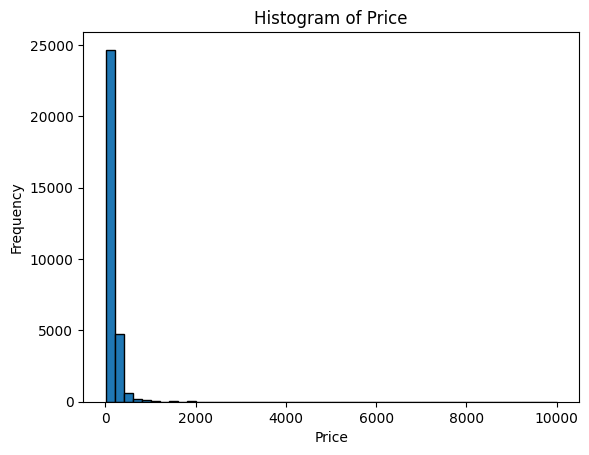

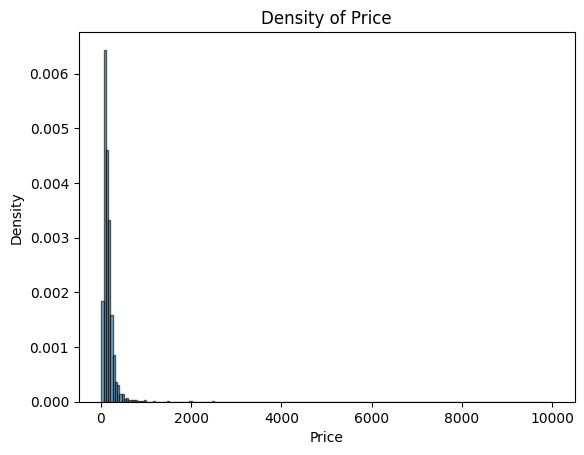

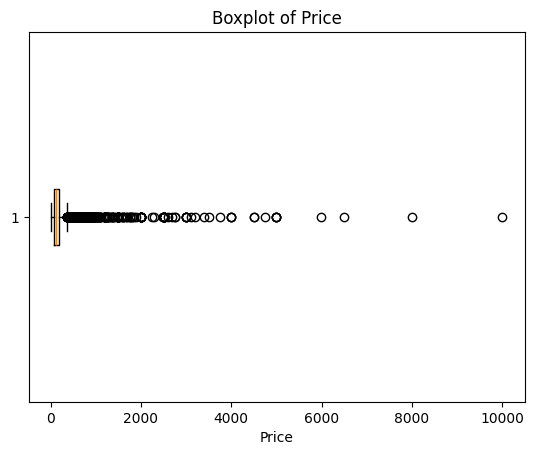

Raw Price Stats:
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price_num, dtype: float64


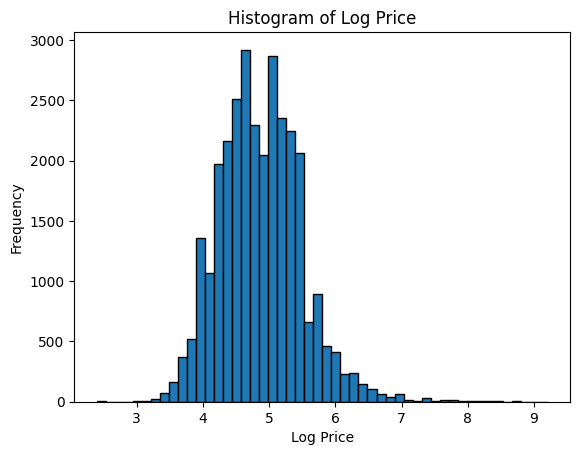

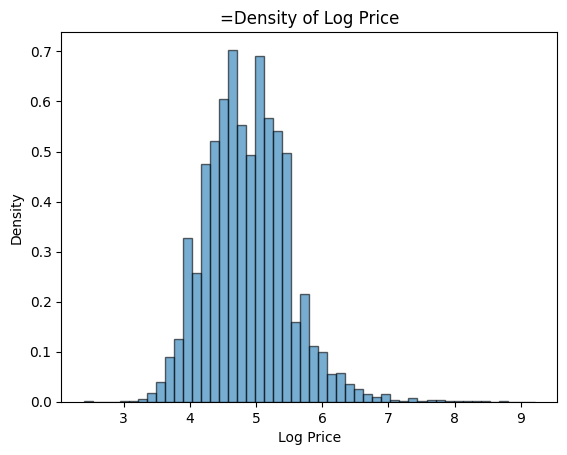

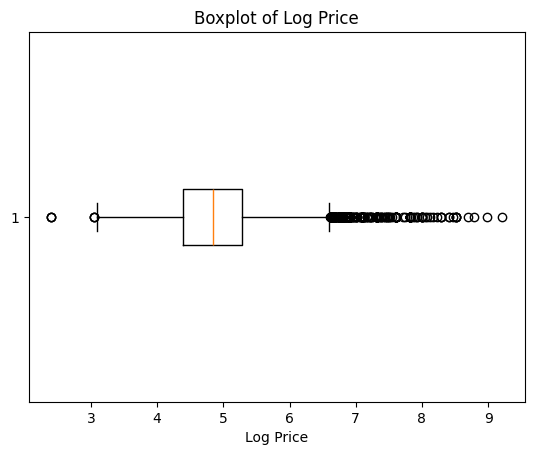

Log Price Stats:
count    30478.000000
mean         4.869699
std          0.622704
min          2.397895
25%          4.394449
50%          4.836282
75%          5.278115
max          9.210440
Name: price_log, dtype: float64


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Clean Price 
raw = df["Price"].astype(str)
clean = raw.str.replace(r"[^0-9.\-]", "", regex=True)
df["Price_num"] = pd.to_numeric(clean, errors="coerce")

plt.hist(df["Price_num"].dropna(), bins=50, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.show()

plt.hist(df["Price_num"].dropna(), bins=200, density=True, alpha=0.6, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density of Price")
plt.show()

plt.boxplot(df["Price_num"].dropna(), vert=False)
plt.xlabel("Price")
plt.title("Boxplot of Price")
plt.show()

print("Raw Price Stats:")
print(df["Price_num"].describe())

# 3) Log transform 
df["price_log"] = np.log1p(df["Price_num"])  # zero check

plt.hist(df["price_log"].dropna(), bins=50, edgecolor="black")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.title("Histogram of Log Price")
plt.show()

plt.hist(df["price_log"].dropna(), bins=50, density=True, alpha=0.6, edgecolor="black")
plt.xlabel("Log Price")
plt.ylabel("Density")
plt.title("=Density of Log Price")
plt.show()

plt.boxplot(df["price_log"].dropna(), vert=False)
plt.xlabel("Log Price")
plt.title("Boxplot of Log Price")
plt.show()

print("Log Price Stats:")
print(df["price_log"].describe())




2.4


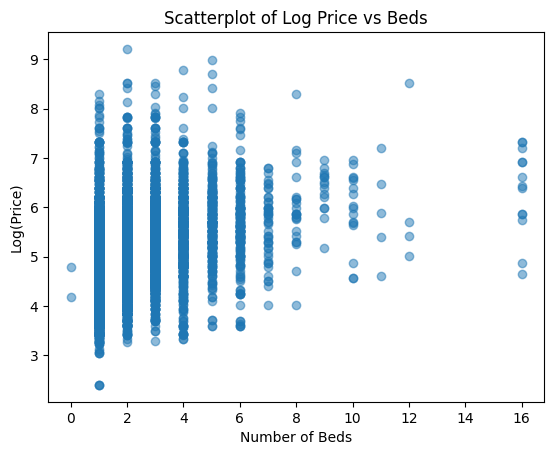

             mean          std    count
Beds                                   
0.0     92.000000    38.183766      2.0
1.0    127.673810   107.047827  20344.0
2.0    199.061271   225.706318   6610.0
3.0    268.118300   303.106942   2071.0
4.0    315.332056   353.184402    783.0
5.0    411.500000   672.610659    284.0
6.0    401.768362   417.018431    177.0
7.0    341.377778   220.116631     45.0
8.0    589.041667   793.054934     24.0
9.0    618.000000   233.649616     15.0
10.0   480.187500   296.820534     16.0
11.0   535.800000   499.217588      5.0
12.0  1418.750000  2388.285211      4.0
16.0   736.000000   496.804287     13.0


In [19]:
#2.5
import matplotlib.pyplot as plt

# Scatterplot of Beds vs log-transformed Price
plt.scatter(df["Beds"], df["price_log"], alpha=0.5)
plt.xlabel("Number of Beds")
plt.ylabel("Log(Price)")
plt.title("Scatterplot of Log Price vs Beds")
plt.show()

# Groupby analysis: Price by number of Beds
beds_summary = df.groupby("Beds")["Price_num"].describe()[["mean", "std", "count"]]
print(beds_summary)


In [ ]:
#2.6


2.5
The scatterplot of price_log against Beds shows that listings with more beds tend to have higher log prices. Most listings are concentrated between 4 or less beds, which dominate the dataset. The groupby table also shows that mean price increases steadily as bed count increases, ad that the standard deviation also grows.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [27]:
import pandas as pd
rigs = pd.read_csv("./data/drilling_rigs.csv")
print("Shape:", rigs.shape)
print(rigs.head())
print(rigs.info())




Shape: (623, 10)
           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                          

The dataset has 623 observations and 10 variables. From the .info() output there was only 3 variables that were read in as numeric while others were read as object so they will have to be typecast/coerced. They will need to be cleaned by coercing non-numeric entries to missing values (NaN) and converting the columns to numeric. 

In [28]:
# Convert Month to datetime
rigs["time"] = pd.to_datetime(rigs["Month"], format="mixed", errors="coerce")

# Check result
print(rigs[["Month", "time"]].head())
print(rigs.info())

           Month       time
0   1973 January 1973-01-01
1  1973 February 1973-02-01
2     1973 March 1973-03-01
3     1973 April 1973-04-01
4       1973 May 1973-05-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                                                                                       Non-Null Count  Dtype         
---  ------                                                                                       --------------  -----         
 0   Month                                                                                        623 non-null    object        
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64         
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64         
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                   

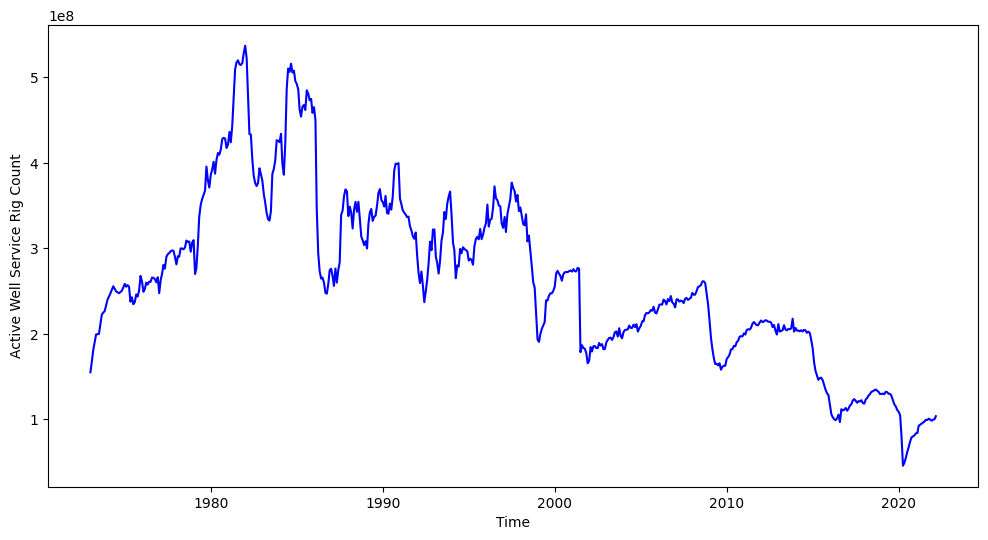

In [34]:
rigs["Active Well Service Rig Count (Number of Rigs)"] = (
    rigs["Active Well Service Rig Count (Number of Rigs)"]
    .astype(str)                                      
    
    .str.replace(r"[^0-9]", "", regex=True)          
)

rigs["Active Well Service Rig Count (Number of Rigs)"] = pd.to_numeric(
    rigs["Active Well Service Rig Count (Number of Rigs)"], errors="coerce"
)

import matplotlib.pyplot as plt

#graph 
plt.figure(figsize=(12,6))
plt.plot(rigs["time"], rigs["Active Well Service Rig Count (Number of Rigs)"], color="blue")
plt.xlabel("Time")
plt.ylabel("Active Well Service Rig Count")
plt.show()



The Active Well Service Rig Count time series shows repeated peaks and declines over time, but overall the counts have decreased from the earlier decades to the most recent years.

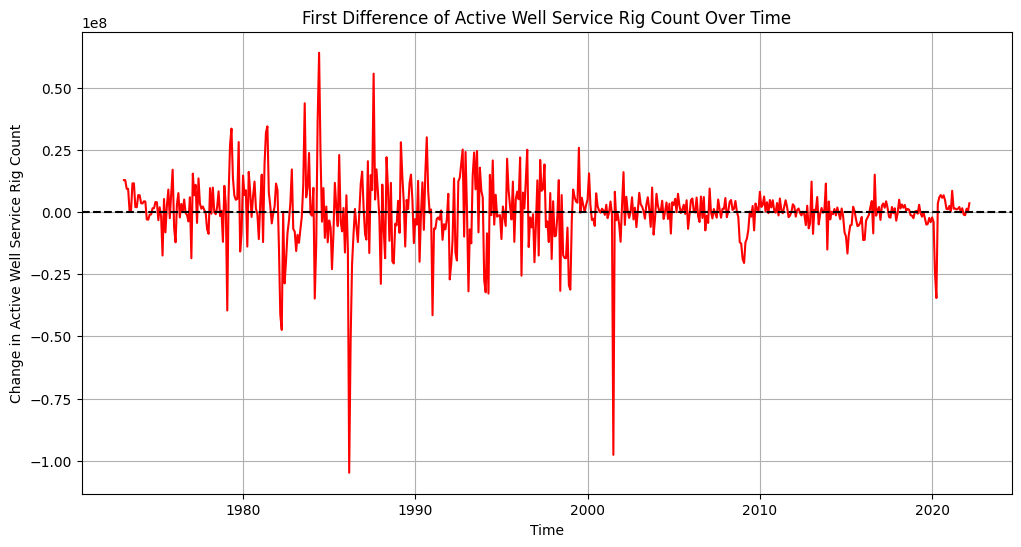

In [35]:
# Compute first difference
rigs["Active_Rig_Diff"] = rigs["Active Well Service Rig Count (Number of Rigs)"].diff()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(rigs["time"], rigs["Active_Rig_Diff"], color="red")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Change in Active Well Service Rig Count")
plt.title("First Difference of Active Well Service Rig Count Over Time")
plt.grid(True)
plt.show()
